In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import wget
import re

#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://e.infogram.com/01266038-4580-4cf0-baab-a532bd968d0c?parent_url=https%3A%2F%2Fwww.ins.gov.co%2FNoticias%2FPaginas%2FCoronavirus.aspx&src=embed#

In [2]:
df = pd.read_csv("Casos_1.csv").drop(columns='ID de caso')

In [3]:
df[['Day', 'Month', 'Year']] = df['Fecha de diagnóstico'].str.split("/",expand=True) 

In [4]:
df = df.dropna()

In [5]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)

In [6]:
df['Year'] = ('20' + df['Year'].str[-2:])

In [7]:
df

,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia,Day,Month,Year
0,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia,6,3,2020
1,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España,9,3,2020
2,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España,9,3,2020
3,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia,11,3,2020
4,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia,11,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
1401,04/04/2020,Cali,Valle del Cauca,Casa,29,F,Importado,0,4,4,2020
1402,04/04/2020,Cali,Valle del Cauca,Casa,40,M,En estudio,0,4,4,2020
1403,04/04/2020,Cali,Valle del Cauca,Casa,32,M,En estudio,0,4,4,2020
1404,04/04/2020,Cali,Valle del Cauca,Casa,41,M,Importado,0,4,4,2020


In [8]:
df['Fecha'] = df['Day'].astype(str)+ '/' + df['Month'].astype(str) + '/' + df['Year']

In [9]:
df['Fecha'] =  pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

In [10]:
df.head()

,Fecha de diagnóstico,Ciudad de ubicación,Departamento o Distrito,Atención**,Edad,Sexo,Tipo*,País de procedencia,Day,Month,Year,Fecha
0,06/03/2020,Bogotá,Bogotá D.C.,Recuperado,19,F,Importado,Italia,6,3,2020,2020-03-06
1,09/03/2020,Buga,Valle del Cauca,Recuperado,34,M,Importado,España,9,3,2020,2020-03-09
2,09/03/2020,Medellín,Antioquia,Recuperado,50,F,Importado,España,9,3,2020,2020-03-09
3,11/03/2020,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia,11,3,2020,2020-03-11
4,11/03/2020,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia,11,3,2020,2020-03-11


In [11]:
total_cases = df.groupby(["Departamento o Distrito", "Fecha"])['Edad'].count()\
            .groupby(level=[0]).cumsum().to_frame().rename(columns={'Edad': 'Casos Totales'})
total_cases = total_cases.sort_index(level=[0, 1])
total_cases.head()

Casos Totales
Departamento o Distrito Fecha                    
Antioquia               2020-03-09              1
                        2020-03-11              4
                        2020-03-14              7
                        2020-03-15              8
                        2020-03-19             11

In [12]:
total_cases = total_cases.unstack(1).fillna(method='ffill', axis=1)

In [13]:
total_cases = total_cases.sort_values(by=total_cases.columns[-1], ascending=False)
total_cases.head()

Casos Totales                                   \
Fecha                      2020-03-06 2020-03-09 2020-03-11 2020-03-12   
Departamento o Distrito                                                  
Bogotá D.C.                       1.0        1.0        3.0        5.0   
Valle del Cauca                   NaN        1.0        1.0        1.0   
Antioquia                         NaN        1.0        4.0        4.0   
Cundinamarca                      NaN        NaN        NaN        NaN   
Cartagena D.T. y C                NaN        NaN        1.0        1.0   

                                                                     \
Fecha                   2020-03-13 2020-03-14 2020-03-15 2020-03-16   
Departamento o Distrito                                               
Bogotá D.C.                    6.0       11.0       19.0       30.0   
Valle del Cauca                2.0        2.0        3.0        3.0   
Antioquia                      4.0        7.0        8.0        8.0   
Cundinamarca                   NaN        NaN        1.0        2.0   
Cartagena D.T. y C             1.0        1.0        3.0        3.0   

                                                                     \
Fecha                   2020-03-17 2020-03-18 2020-03-19 2020-03-20   
Departamento o Distrito                                               
Bogotá D.C.                   39.0       44.0       52.0       81.0   
Valle del Cauca                5.0       13.0       14.0       15.0   
Antioquia                      8.0        8.0       11.0       22.0   
Cundinamarca                   2.0        4.0        5.0        8.0   
Cartagena D.T. y C             5.0        7.0        9.0        9.0   

                                                                     \
Fecha                   2020-03-21 2020-03-22 2020-03-23 2020-03-24   
Departamento o Distrito                                               
Bogotá D.C.                   87.0       91.0      113.0      161.0   
Valle del Cauca               26.0       31.0       37.0       66.0   
Antioquia                     25.0       30.0       52.0       52.0   
Cundinamarca                   9.0        9.0       14.0       21.0   
Cartagena D.T. y C            14.0       14.0       16.0       21.0   

                                                                     \
Fecha                   2020-03-25 2020-03-26 2020-03-27 2020-03-28   
Departamento o Distrito                                               
Bogotá D.C.                  177.0      184.0      222.0      260.0   
Valle del Cauca               71.0       73.0       73.0       84.0   
Antioquia                     60.0       60.0       60.0       67.0   
Cundinamarca                  22.0       22.0       23.0       25.0   
Cartagena D.T. y C            26.0       26.0       26.0       27.0   

                                                                     \
Fecha                   2020-03-29 2020-03-30 2020-03-31 2020-04-01   
Departamento o Distrito                                               
Bogotá D.C.                  293.0      349.0      390.0      472.0   
Valle del Cauca               92.0      105.0      116.0      147.0   
Antioquia                     86.0       96.0      101.0      107.0   
Cundinamarca                  25.0       29.0       38.0       42.0   
Cartagena D.T. y C            34.0       37.0       39.0       39.0   

                                                          
Fecha                   2020-04-02 2020-04-03 2020-04-04  
Departamento o Distrito                                   
Bogotá D.C.                  542.0      587.0      695.0  
Valle del Cauca              150.0      165.0      178.0  
Antioquia                    127.0      146.0      150.0  
Cundinamarca                  42.0       44.0       47.0  
Cartagena D.T. y C            39.0       42.0       42.0

In [14]:
total_cases.sort_index(level=[0,1], axis=1)

Casos Totales                                   \
Fecha                      2020-03-06 2020-03-09 2020-03-11 2020-03-12   
Departamento o Distrito                                                  
Bogotá D.C.                       1.0        1.0        3.0        5.0   
Valle del Cauca                   NaN        1.0        1.0        1.0   
Antioquia                         NaN        1.0        4.0        4.0   
Cundinamarca                      NaN        NaN        NaN        NaN   
Cartagena D.T. y C                NaN        NaN        1.0        1.0   
Barranquilla D.E.                 NaN        NaN        NaN        NaN   
Risaralda                         NaN        NaN        NaN        NaN   
Huila                             NaN        NaN        NaN        2.0   
Norte de Santander                NaN        NaN        NaN        NaN   
Quindío                           NaN        NaN        NaN        NaN   
Cesar                             NaN        NaN        NaN        NaN   
Caldas                            NaN        NaN        NaN        NaN   
Tolima                            NaN        NaN        NaN        NaN   
Meta                              NaN        NaN        NaN        NaN   
Boyacá                            NaN        NaN        NaN        NaN   
Santander                         NaN        NaN        NaN        NaN   
Cauca                             NaN        NaN        NaN        NaN   
Santa Marta D.T. y C.             NaN        NaN        NaN        NaN   
Nariño                            NaN        NaN        NaN        NaN   
Atlántico                         NaN        NaN        NaN        NaN   
Córdoba                           NaN        NaN        NaN        NaN   
Bolívar                           NaN        NaN        NaN        NaN   
Casanare                          NaN        NaN        NaN        NaN   
San Andrés                        NaN        NaN        NaN        NaN   
Sucre                             NaN        NaN        NaN        NaN   
La Guajira                        NaN        NaN        NaN        NaN   
Valle del cauca                   NaN        NaN        NaN        NaN   

                                                                     \
Fecha                   2020-03-13 2020-03-14 2020-03-15 2020-03-16   
Departamento o Distrito                                               
Bogotá D.C.                    6.0       11.0       19.0       30.0   
Valle del Cauca                2.0        2.0        3.0        3.0   
Antioquia                      4.0        7.0        8.0        8.0   
Cundinamarca                   NaN        NaN        1.0        2.0   
Cartagena D.T. y C             1.0        1.0        3.0        3.0   
Barranquilla D.E.              NaN        NaN        NaN        NaN   
Risaralda                      NaN        NaN        1.0        1.0   
Huila                          2.0        2.0        7.0        7.0   
Norte de Santander             NaN        NaN        1.0        1.0   
Quindío                        NaN        NaN        NaN        NaN   
Cesar                          NaN        NaN        NaN        NaN   
Caldas                         NaN        NaN        1.0        1.0   
Tolima                         NaN        NaN        NaN        NaN   
Meta                           1.0        1.0        1.0        1.0   
Boyacá                         NaN        NaN        NaN        NaN   
Santander                      NaN        NaN        NaN        NaN   
Cauca                          NaN        NaN        NaN        NaN   
Santa Marta D.T. y C.          NaN        NaN        NaN        NaN   
Nariño                         NaN        NaN        NaN        NaN   
Atlántico                      NaN        NaN        NaN        NaN   
Córdoba                        NaN        NaN        NaN        NaN   
Bolívar                        NaN        NaN        NaN        NaN   
Casanare                    

In [15]:
total_cases.index.tolist()

['Bogotá D.C.',
 'Valle del Cauca',
 'Antioquia',
 'Cundinamarca',
 'Cartagena D.T. y C',
 'Barranquilla D.E.',
 'Risaralda',
 'Huila',
 'Norte de Santander',
 'Quindío',
 'Cesar',
 'Caldas',
 'Tolima',
 'Meta',
 'Boyacá',
 'Santander',
 'Cauca',
 'Santa Marta D.T. y C.',
 'Nariño',
 'Atlántico',
 'Córdoba',
 'Bolívar',
 'Casanare',
 'San Andrés',
 'Sucre',
 'La Guajira',
 'Valle del cauca']

In [16]:
names_to_plot = []

In [17]:
for per_name in total_cases.index.tolist()[:]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [18]:
names_to_plot

['Bogotá D.C.',
 'Valle del Cauca',
 'Antioquia',
 'Cundinamarca',
 'Cartagena D.T. y C',
 'Barranquilla D.E.',
 'Risaralda',
 'Huila',
 'Norte de Santander',
 'Quindío',
 'Cesar',
 'Caldas',
 'Tolima',
 'Meta',
 'Boyacá',
 'Santander',
 'Cauca',
 'Santa Marta D.T. y C.',
 'Nariño',
 'Atlántico',
 'Córdoba',
 'Bolívar',
 'Casanare',
 'San Andrés',
 'Sucre',
 'La Guajira',
 'Valle del cauca']

In [19]:
def plot_history(df, low_cases=1, high_cases=100, max_periods=20):
    fig, ax = plt.subplots(figsize=(20,12))
    LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
    colors = [f'C{i}' for i in range(6)]
    ls = 0
    count = 0
    for name in names_to_plot:
        row = df.loc[name, :]
        if name in names_to_plot:
            if (row.min()<0.1*high_cases) & (name not in []):
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                current_data = row[(row>=low_cases) & (row<=high_cases)]
                if len(current_data)>0:
                    values_to_plot = current_data.values[:max_periods]
                    if name in ['Bogotá D.C.', 'Antioquia', 'Valle', "Cartagena", "Risaralda", "Cundinamarca"]:
                        ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                                linestyle=ls_i, color=c_i, alpha=0.5)
                    else:
                        ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                                linestyle=ls_i, color=c_i)
                # Changing colors
                if count>4:
                    count=0
                    ls+=1
                else:
                    count+=1
            else:
                pass
        ax.legend(fontsize=14)
        ax.set_yscale('log')
        ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_yticks([10**i*j*low_cases for j in [1,2,5] for i in np.arange(0, 3, 1.0)])
        ax.set_xticks(range(1, max_periods,1))
        ax.set_xlabel(f'Número de días después de reportas al menos {low_cases} caso')
        ax.set_ylabel("Casos totales reportados")
        ax.set_title(f"COVID-19 Casos totales por Dpto después de reportar por lo menos {low_cases} caso")
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor', labelsize=15)
        ax.text(max_periods*0.8, 0.5, f'Update: {df.columns[-1][1].strftime(format="%d/%m/%Y")}')
        ax.text(-0.0,0.5, 'Fuente: Instituto Nacional de Salud')
    plt.show()

In [20]:
total_cases

Casos Totales                                   \
Fecha                      2020-03-06 2020-03-09 2020-03-11 2020-03-12   
Departamento o Distrito                                                  
Bogotá D.C.                       1.0        1.0        3.0        5.0   
Valle del Cauca                   NaN        1.0        1.0        1.0   
Antioquia                         NaN        1.0        4.0        4.0   
Cundinamarca                      NaN        NaN        NaN        NaN   
Cartagena D.T. y C                NaN        NaN        1.0        1.0   
Barranquilla D.E.                 NaN        NaN        NaN        NaN   
Risaralda                         NaN        NaN        NaN        NaN   
Huila                             NaN        NaN        NaN        2.0   
Norte de Santander                NaN        NaN        NaN        NaN   
Quindío                           NaN        NaN        NaN        NaN   
Cesar                             NaN        NaN        NaN        NaN   
Caldas                            NaN        NaN        NaN        NaN   
Tolima                            NaN        NaN        NaN        NaN   
Meta                              NaN        NaN        NaN        NaN   
Boyacá                            NaN        NaN        NaN        NaN   
Santander                         NaN        NaN        NaN        NaN   
Cauca                             NaN        NaN        NaN        NaN   
Santa Marta D.T. y C.             NaN        NaN        NaN        NaN   
Nariño                            NaN        NaN        NaN        NaN   
Atlántico                         NaN        NaN        NaN        NaN   
Córdoba                           NaN        NaN        NaN        NaN   
Bolívar                           NaN        NaN        NaN        NaN   
Casanare                          NaN        NaN        NaN        NaN   
San Andrés                        NaN        NaN        NaN        NaN   
Sucre                             NaN        NaN        NaN        NaN   
La Guajira                        NaN        NaN        NaN        NaN   
Valle del cauca                   NaN        NaN        NaN        NaN   

                                                                     \
Fecha                   2020-03-13 2020-03-14 2020-03-15 2020-03-16   
Departamento o Distrito                                               
Bogotá D.C.                    6.0       11.0       19.0       30.0   
Valle del Cauca                2.0        2.0        3.0        3.0   
Antioquia                      4.0        7.0        8.0        8.0   
Cundinamarca                   NaN        NaN        1.0        2.0   
Cartagena D.T. y C             1.0        1.0        3.0        3.0   
Barranquilla D.E.              NaN        NaN        NaN        NaN   
Risaralda                      NaN        NaN        1.0        1.0   
Huila                          2.0        2.0        7.0        7.0   
Norte de Santander             NaN        NaN        1.0        1.0   
Quindío                        NaN        NaN        NaN        NaN   
Cesar                          NaN        NaN        NaN        NaN   
Caldas                         NaN        NaN        1.0        1.0   
Tolima                         NaN        NaN        NaN        NaN   
Meta                           1.0        1.0        1.0        1.0   
Boyacá                         NaN        NaN        NaN        NaN   
Santander                      NaN        NaN        NaN        NaN   
Cauca                          NaN        NaN        NaN        NaN   
Santa Marta D.T. y C.          NaN        NaN        NaN        NaN   
Nariño                         NaN        NaN        NaN        NaN   
Atlántico                      NaN        NaN        NaN        NaN   
Córdoba                        NaN        NaN        NaN        NaN   
Bolívar                        NaN        NaN        NaN        NaN   
Casanare                    

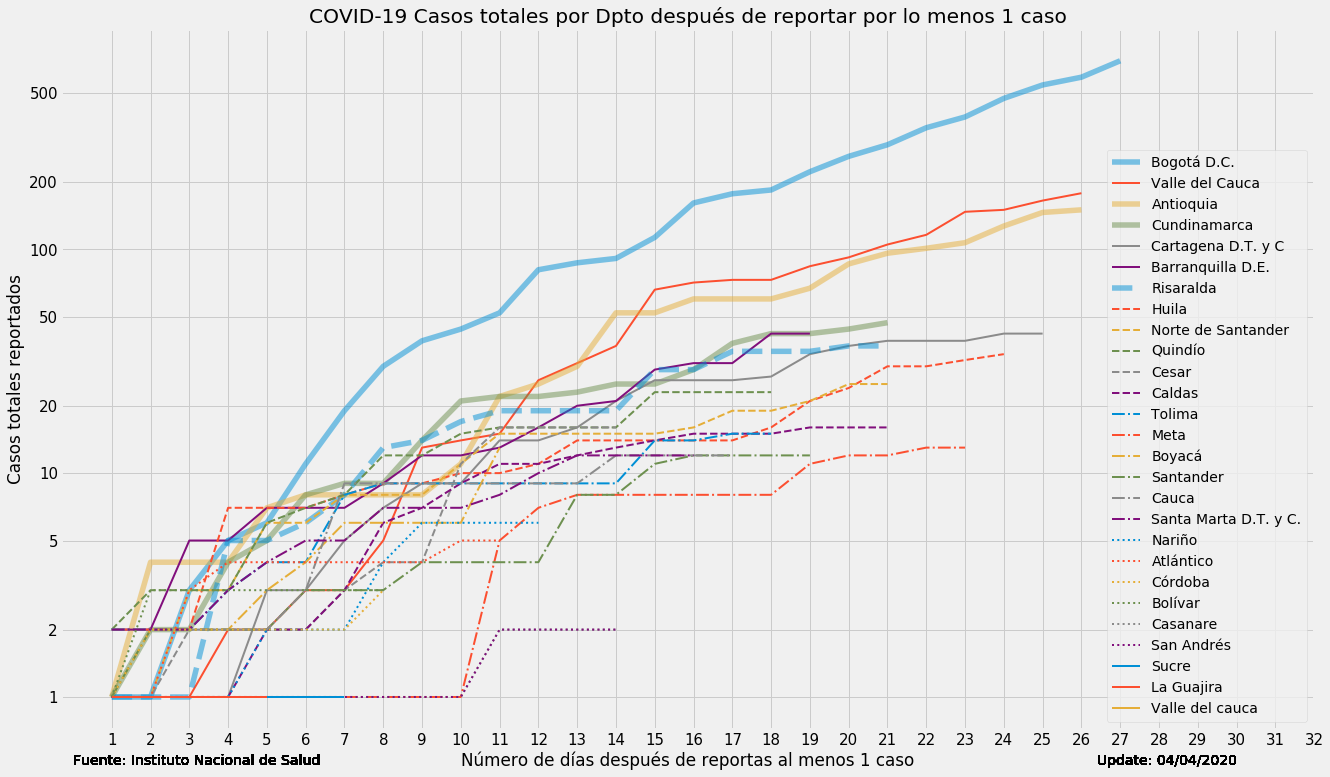

In [23]:
plot_history(total_cases, low_cases=1, high_cases=1000, max_periods=33)